# Digit recognition in Machine Learning


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.

## Preparing data


In [101]:
import pandas as pd

# Load data
df_train = pd.read_csv("Datasets/train.csv")
df_test = pd.read_csv("Datasets/test.csv")

In [102]:
# Split data into train and test
y_train = df_train["label"]
X_train = df_train.drop("label", axis=1)

y_test = []  # Empty no labels for test data
X_test = df_test

## Show images info

In [103]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Plot images

Plot images as BW with reverse BW.

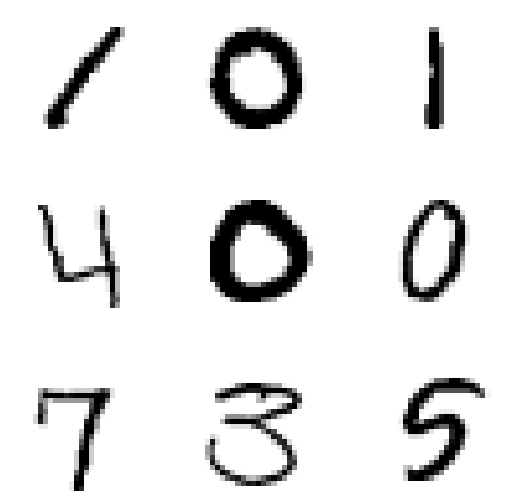

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Images processing

In [106]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling
## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)


### OR

### Image binarization
# Convert the image to BW or keep them as grayscale, because grayscale doesn't add any information.


## Data augmentation

## Prepare models

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}

# gsCV = GridSearchCV(knn, grid_params, verbose=3)

## Train models

In [108]:
# print(gsCV.fit(X_train, y_train))

## Manual tests

1.0


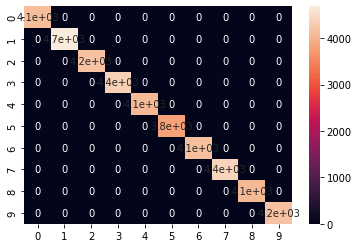

In [109]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))
y_pred = knn.predict(X_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


0.9891428571428571


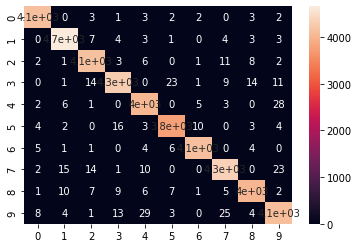

In [115]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train,y_train))
y_pred = svc.predict(X_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

0.5557142857142857


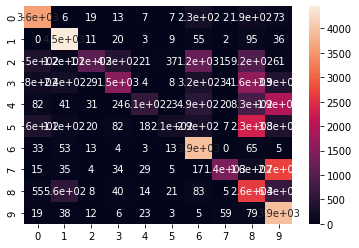

In [116]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train,y_train))
y_pred = gnb.predict(X_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

1.0


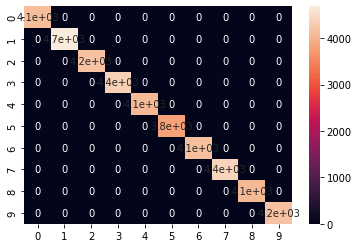

In [117]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)
print(rnd_forest.score(X_train,y_train))
y_pred = rnd_forest.predict(X_train)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [118]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

votingClassifier = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('rnd_forest', rnd_forest)], voting='hard')
votingClassifier.fit(X_train, y_train)

NameError: name 'svc' is not defined

## Choose best model

In [110]:
# print(gsCV.best_params_)

In [111]:
# print(gsCV.best_score_)

## Train and test chosen model

In [112]:
# print(gsCV.best_estimator_.fit(X_train, y_train))

In [113]:
# y_pred = gsCV.best_estimator_.predict(X_train)

## Results

In [114]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
#
# cm = confusion_matrix(y_train, y_pred)
# sns.heatmap(cm, annot=True)
# plt.show()

## Conclusion